# Streaming process mining with `pyBeamline`

`pyBeamline` is a Python version of Beamline. While the same set of ideas and principles of Beamline have been ported into `pyBeamline`, the underlying goal and technology is very different.

pyBeamline is based on ReactiveX and its Python binding RxPY. RxPY is a library for composing asynchronous and event-based programs using observable sequences and pipable query operators in Python. Using pyBeamline it is possible to inject process mining operators into the computation.

This Jupyter notebook contains the main functionalities currently exposed by `pyBeamline`. For a complete documentation of the library see https://www.beamline.cloud/pybeamline/. In the rest of the notebook it is assumed that the `pyBeamline` package is already installed.

In the rest of this document, the main functionalities are exposed.

It is possible to install the library using:

In [1]:
!pip install pybeamline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.6/218.6 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 340.3/340.3 kB 21.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into 

In [2]:
# Let's ignore some PM4PY warnings in the notebook
import warnings
warnings.filterwarnings("ignore")

### Sources

In [9]:
from pybeamline.sources import string_test_source
from pybeamline.sinks.print_sink import print_sink

string_test_source(["ABC", "ACB", "EFG"]) \
    .subscribe(print_sink())

(A, case_1, Process, 2026-01-19 16:46:10.976502 - {} - {} - {})
(B, case_1, Process, 2026-01-19 16:46:10.976747 - {} - {} - {})
(C, case_1, Process, 2026-01-19 16:46:10.976779 - {} - {} - {})
(A, case_2, Process, 2026-01-19 16:46:10.976799 - {} - {} - {})
(C, case_2, Process, 2026-01-19 16:46:10.976816 - {} - {} - {})
(B, case_2, Process, 2026-01-19 16:46:10.976832 - {} - {} - {})
(E, case_3, Process, 2026-01-19 16:46:10.976849 - {} - {} - {})
(F, case_3, Process, 2026-01-19 16:46:10.976866 - {} - {} - {})
(G, case_3, Process, 2026-01-19 16:46:10.976882 - {} - {} - {})


In [4]:
!wget https://raw.githubusercontent.com/beamline/pybeamline/refs/heads/master/tests/log.xes

--2026-01-19 16:44:43--  https://raw.githubusercontent.com/beamline/pybeamline/refs/heads/master/tests/log.xes
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2029 (2.0K) [text/plain]
Saving to: ‘log.xes’

log.xes             100%[===================>]   1.98K  --.-KB/s    in 0s      

2026-01-19 16:44:43 (34.3 MB/s) - ‘log.xes’ saved [2029/2029]



In [10]:
from pybeamline.sources import xes_log_source_from_file
from pybeamline.sinks.print_sink import print_sink

xes_log_source_from_file("log.xes") \
    .subscribe(print_sink())

parsing log, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

(a11, c1, log-file, 2026-01-19 16:46:24.359109 - {'lifecycle:transition': 'complete', 'act': 'a11'} - {'variant-index': 1, 'variant': 'Variant 1', 'creator': 'Fluxicon Disco'} - {})
(a12, c1, log-file, 2026-01-19 16:46:24.359683 - {'lifecycle:transition': 'complete', 'act': 'a12'} - {'variant-index': 1, 'variant': 'Variant 1', 'creator': 'Fluxicon Disco'} - {})
(a21, c2, log-file, 2026-01-19 16:46:24.359964 - {'lifecycle:transition': 'complete', 'act': 'a21'} - {'variant-index': 2, 'variant': 'Variant 2', 'creator': 'Fluxicon Disco'} - {})
(a22, c2, log-file, 2026-01-19 16:46:24.360797 - {'lifecycle:transition': 'complete', 'act': 'a22'} - {'variant-index': 2, 'variant': 'Variant 2', 'creator': 'Fluxicon Disco'} - {})
(a23, c2, log-file, 2026-01-19 16:46:24.361010 - {'lifecycle:transition': 'complete', 'act': 'a23'} - {'variant-index': 2, 'variant': 'Variant 2', 'creator': 'Fluxicon Disco'} - {})


In [11]:
from pybeamline.sources import log_source
from pybeamline.sinks.print_sink import print_sink

log_source(["ABC", "ACB", "EFG"]) \
    .subscribe(print_sink())

log_source("log.xes") \
    .subscribe(print_sink())

(A, case_1, Process, 2026-01-19 16:46:47.603102 - {} - {} - {})
(B, case_1, Process, 2026-01-19 16:46:47.603337 - {} - {} - {})
(C, case_1, Process, 2026-01-19 16:46:47.603369 - {} - {} - {})
(A, case_2, Process, 2026-01-19 16:46:47.603382 - {} - {} - {})
(C, case_2, Process, 2026-01-19 16:46:47.603393 - {} - {} - {})
(B, case_2, Process, 2026-01-19 16:46:47.603402 - {} - {} - {})
(E, case_3, Process, 2026-01-19 16:46:47.603412 - {} - {} - {})
(F, case_3, Process, 2026-01-19 16:46:47.603422 - {} - {} - {})
(G, case_3, Process, 2026-01-19 16:46:47.603432 - {} - {} - {})


parsing log, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

(a11, c1, log-file, 2026-01-19 16:46:47.638745 - {'lifecycle:transition': 'complete', 'act': 'a11'} - {'variant-index': 1, 'variant': 'Variant 1', 'creator': 'Fluxicon Disco'} - {})
(a12, c1, log-file, 2026-01-19 16:46:47.639339 - {'lifecycle:transition': 'complete', 'act': 'a12'} - {'variant-index': 1, 'variant': 'Variant 1', 'creator': 'Fluxicon Disco'} - {})
(a21, c2, log-file, 2026-01-19 16:46:47.639718 - {'lifecycle:transition': 'complete', 'act': 'a21'} - {'variant-index': 2, 'variant': 'Variant 2', 'creator': 'Fluxicon Disco'} - {})
(a22, c2, log-file, 2026-01-19 16:46:47.639996 - {'lifecycle:transition': 'complete', 'act': 'a22'} - {'variant-index': 2, 'variant': 'Variant 2', 'creator': 'Fluxicon Disco'} - {})
(a23, c2, log-file, 2026-01-19 16:46:47.640266 - {'lifecycle:transition': 'complete', 'act': 'a23'} - {'variant-index': 2, 'variant': 'Variant 2', 'creator': 'Fluxicon Disco'} - {})


In [ ]:
from pybeamline.sources import mqttxes_source

mqttxes_source('broker.mqtt.cool', 1883, 'bla/bla/') \
  .subscribe(on_next=lambda x: print(str(x)))

input()

Connected to MQTT broker


't'

In [12]:
from pybeamline.sources import xes_log_source_from_file, log_source

src1 = xes_log_source_from_file("log.xes")
src2 = log_source(["ABCD", "ABCD"])
src3 = xes_log_source_from_file("log.xes")

src1.concat(src2).concat(src3).subscribe(print_sink())


parsing log, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

parsing log, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

(a11, c1, log-file, 2026-01-19 16:47:00.732980 - {'lifecycle:transition': 'complete', 'act': 'a11'} - {'variant-index': 1, 'variant': 'Variant 1', 'creator': 'Fluxicon Disco'} - {})
(a12, c1, log-file, 2026-01-19 16:47:00.733581 - {'lifecycle:transition': 'complete', 'act': 'a12'} - {'variant-index': 1, 'variant': 'Variant 1', 'creator': 'Fluxicon Disco'} - {})
(a21, c2, log-file, 2026-01-19 16:47:00.733868 - {'lifecycle:transition': 'complete', 'act': 'a21'} - {'variant-index': 2, 'variant': 'Variant 2', 'creator': 'Fluxicon Disco'} - {})
(a22, c2, log-file, 2026-01-19 16:47:00.734136 - {'lifecycle:transition': 'complete', 'act': 'a22'} - {'variant-index': 2, 'variant': 'Variant 2', 'creator': 'Fluxicon Disco'} - {})
(a23, c2, log-file, 2026-01-19 16:47:00.734398 - {'lifecycle:transition': 'complete', 'act': 'a23'} - {'variant-index': 2, 'variant': 'Variant 2', 'creator': 'Fluxicon Disco'} - {})
(A, case_1, Process, 2026-01-19 16:47:00.736747 - {} - {} - {})
(B, case_1, Process, 2026-

### Filters

In [13]:
from pybeamline.sources import log_source
from pybeamline.filters import excludes_activity_filter

log_source("log.xes").pipe(
    excludes_activity_filter("a11"),
).subscribe(print_sink())

# Similar functionalities for these filters:
# - excludes_on_event_attribute_equal_filter
# - retains_on_trace_attribute_equal_filter
# - excludes_on_trace_attribute_equal_filter
# - retains_activity_filter
# - excludes_activity_filter


parsing log, completed traces ::   0%|          | 0/2 [00:00<?, ?it/s]

(a12, c1, log-file, 2026-01-19 16:47:08.297133 - {'lifecycle:transition': 'complete', 'act': 'a12'} - {'variant-index': 1, 'variant': 'Variant 1', 'creator': 'Fluxicon Disco'} - {})
(a21, c2, log-file, 2026-01-19 16:47:08.297833 - {'lifecycle:transition': 'complete', 'act': 'a21'} - {'variant-index': 2, 'variant': 'Variant 2', 'creator': 'Fluxicon Disco'} - {})
(a22, c2, log-file, 2026-01-19 16:47:08.298211 - {'lifecycle:transition': 'complete', 'act': 'a22'} - {'variant-index': 2, 'variant': 'Variant 2', 'creator': 'Fluxicon Disco'} - {})
(a23, c2, log-file, 2026-01-19 16:47:08.298690 - {'lifecycle:transition': 'complete', 'act': 'a23'} - {'variant-index': 2, 'variant': 'Variant 2', 'creator': 'Fluxicon Disco'} - {})


### Discovery techniques

Mining of directly-follows relations:

In [14]:
from pybeamline.sources import log_source
from pybeamline.mappers import infinite_size_directly_follows_mapper

log_source(["ABC", "ACB"]).pipe(
    infinite_size_directly_follows_mapper()
).subscribe(print_sink())

('A', 'B')
('B', 'C')
('A', 'C')
('C', 'B')


Mining of a Heuristics net using Lossy Counting:

In [15]:
from pybeamline.algorithms.discovery import heuristics_miner_lossy_counting

log_source(["ABCD", "ABCD"]).pipe(
    heuristics_miner_lossy_counting(model_update_frequency=4)
).subscribe(print_sink())

{'A': (node:A connections:{B:[0.5]}), 'B': (node:B connections:{C:[0.5]}), 'C': (node:C connections:{})}
{'C': (node:C connections:{D:[0.5]}), 'D': (node:D connections:{}), 'A': (node:A connections:{B:[0.6666666666666666]}), 'B': (node:B connections:{C:[0.6666666666666666]})}


Mining of a Heuristics net using Lossy Counting with Budget:

In [16]:
from pybeamline.algorithms.discovery import heuristics_miner_lossy_counting_budget

log_source(["ABCD", "ABCD"]).pipe(
    heuristics_miner_lossy_counting_budget(model_update_frequency=4)
).subscribe(print_sink())

{'A': (node:A connections:{B:[0.5]}), 'B': (node:B connections:{C:[0.5]}), 'C': (node:C connections:{D:[0.5]}), 'D': (node:D connections:{})}
{'A': (node:A connections:{B:[0.6666666666666666]}), 'B': (node:B connections:{C:[0.6666666666666666]}), 'C': (node:C connections:{D:[0.6666666666666666]}), 'D': (node:D connections:{})}


### Conformance checking

Currently only conformance checking using behavioral profiles is supported:

In [17]:
from pybeamline.algorithms.conformance import mine_behavioral_model_from_stream, behavioral_conformance

source = log_source(["ABCD", "ABCD"])
reference_model = mine_behavioral_model_from_stream(source)
print(reference_model)

log_source(["ABCD", "ABCD"]).pipe(
    excludes_activity_filter("A"),
    behavioral_conformance(reference_model)
).subscribe(print_sink())

([('A', 'B'), ('B', 'C'), ('C', 'D')], {('A', 'B'): (0, 0), ('B', 'C'): (1, 1), ('C', 'D'): (2, 2)}, {('A', 'B'): 2, ('B', 'C'): 1, ('C', 'D'): 0})
(1.0, 0.5, 1, 2)
(1.0, 1.0, 1, 3)
(1.0, 0.5, 1, 5)
(1.0, 1.0, 1, 6)


### Sliding window

This technique allows to apply any existing process mininig technique on streaming data

In [18]:
from pybeamline.mappers import sliding_window_to_log
from pybeamline.mappers.windows import sliding_window
from pybeamline.sources import log_source
import pm4py

def mine(log):
    print(pm4py.discover_dfg_typed(log))

log_source(["ABC", "ABD"]).pipe(
    sliding_window(3, 3),
    sliding_window_to_log()
).subscribe(on_next=mine)

Counter({('A', 'B'): 1, ('B', 'C'): 1})
Counter({('A', 'B'): 1, ('B', 'D'): 1})


## Lambda operator

In [19]:
from pybeamline.algorithms.lambda_operator import lambda_operator
from pybeamline.sources.string_test_source import string_test_source


def my_filter(event):
    return event if (event.get_event_name() == "A") else None


def my_miner(event):
    return [('Start', event.get_event_name())]


string_test_source(["ABCDE", "ACBDE"]).pipe(
    lambda_operator(my_filter),
    lambda_operator(my_miner)
).subscribe(print_sink())


[('Start', 'A')]
[('Start', 'A')]


# Integration with other libraries

## River

In [20]:
!pip install river

In [21]:
import random

log_original = ["ABCD"]*10000 + ["ACBD"]*500
random.shuffle(log_original)

log_after_drift = ["ABCD"]*500 + ["ACBD"]*10000
random.shuffle(log_after_drift)

log_with_drift = log_source(log_original + log_after_drift + log_original)

In [22]:
import reactivex

from pybeamline.stream.rx_operator import RxOperator
from pybeamline.stream.base_sink import BaseSink
from typing import Optional, List
from pybeamline.stream.base_map import BaseMap
from river import drift
from reactivex import operators as ops

class CheckForDrift(BaseMap[int, int]):

    def __init__(self):
        self.drift_detector = drift.ADWIN()
        self.drifts = []
        self.index = 0

    def transform(self, value: int) -> Optional[List[int]]:
        self.drift_detector.update(value)
        self.index += 1
        if self.drift_detector.drift_detected:
            self.drifts.append(self.index)
        return [value]

class CollectSink(BaseSink[int]):

    def __init__(self):
        self.data = []

    def consume(self, item: int) -> None:
        self.data.append(item)


drift_detector = CheckForDrift()
collector = CollectSink()

log_with_drift.pipe(RxOperator(ops.buffer_with_count(40)),
  RxOperator(ops.flat_map(lambda events: reactivex.from_iterable(events).pipe(
      ops.pairwise(),
      ops.filter(lambda x: x[0].get_trace_name() == x[1].get_trace_name() and x[0].get_event_name() == "B" and x[1].get_event_name() == "C"),
      ops.count()
      )
  )),
  drift_detector
).sink(collector)

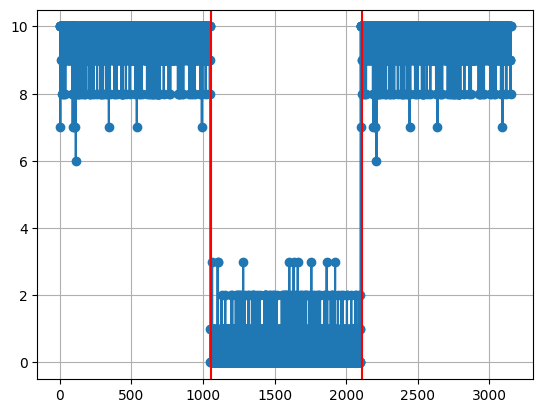

In [23]:
import matplotlib.pyplot as plt

plt.plot(collector.data, marker='o')
plt.grid()
for drift_detected in drift_detector.drifts:
    plt.axvline(drift_detected, color='red')
plt.show()